# Homework 1 - Algebra lineare numerica

## 1. Zeri di funzione
Utilizzare il metodo di bisezione, il metodo delle iterazioni di punto fisso e 
il metodo di Newton per il calcolo dello zero della
una funzione $f(x) = e^x − x^2$ la cui soluzione è $x* = −0.7034674 $

Per il metodo delle iterazioni di punto fisso considerare come funzione $g(x)$:
- $ g(x) = x − f(x)e^{x/2} $
- $ g(x) = x − f(x)e^{−x/2} $



In [11]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return np.exp(x)-(x**2)

def df(x):
    return np.exp(x) - 2*x

def g1(x):
   return x - f(x) * np.exp(x/2)

def g2(x):
   return x - f(x) * np.exp(-x/2)

def bisezione(f, a ,b, e_tol=1e-8):
    iterzioni=[]

    e_max=(b-a)/2
    while e_max > e_tol:

        c=(a+b)/2
        iterzioni.append(c)
    
        if(f(a)*f(c))<0:
            b=c
        else:
            a=c

        e_max=(b-a)/2   
    return  iterzioni

def newton(f,df, x0, tol, max_iter):
    x = x0
    iterazioni = [x0]

    for i in range(max_iter):
        x_succ = x - f(x) / df(x)

        iterazioni.append(x_succ)
    
        if np.abs(f(x_succ)) < tol:
            break
        x = x_succ
    return iterazioni

def iter_p_fisso(f, g, x0, tol, max_iter):
    x = x0
    iterazioni = [x0]

    for i in range(max_iter):
        x_succ = g(x)
        iterazioni.append(x_succ)
        if np.abs(f(x_succ)) < tol:
            break
        x = x_succ
    return iterazioni

x_star= -0.7034674


Per analizzare i risultati utilizzare strumenti grafici e tabelle. In particolare:
- Disegnare il grafico della funzione f nell’intervallo $ I = [-1,1]$ e verificare che $x*$ ssia lo zero di f in $[-1, 1]$.


x_star = -0.7034674
f(x_star) = 4.278746923436216e-08


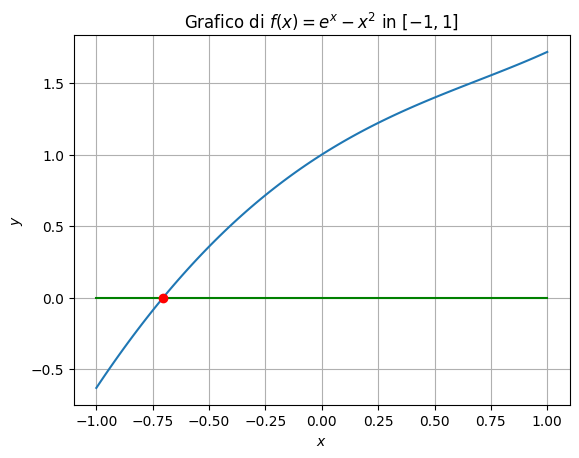

In [12]:
a=-1
b=1
N=100

xx = np.linspace(a, b, 100)
yy=f(xx)

plt.title(r'Grafico di $f(x) = e^x-x^2$ in $[-1,1]$')
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.grid()

plt.plot(xx,yy) #disegna grafico f(x)
plt.plot([a,b],[0,0],'g') #disegna asse x
plt.plot(x_star,f(x_star), color="red", marker="o") #verifica che x* sia F(x)=0

print(f"x_star = {x_star}")
print(f"f(x_star) = {f(x_star)}")

plt.show()

- Confrontare l’accuratezza delle soluzioni trovate e il numero di iterazioni effettuate dai solutori.

In [13]:
#parametri iniziali
e_tol = 1e-7

#bisezione
iter_bis= bisezione(f, a, b, e_tol)

print(f"\nMetodo di Bisezione:")
print(f"Soluzione approssimata = {iter_bis[-1]}")
print(f"numero iterazioni = {len(iter_bis)}")

#newton
iter_new= newton(f,df,0,e_tol,100)
print(f"\nMetodo di Newton:")
print(f"Soluzione approssimata = {iter_new[-1]}")
print(f"numero iterazioni = {len(iter_new)-1}")

#iterazioni punto fisso con g1
iter_pf1= iter_p_fisso (f,g1,0,e_tol,100)

print(f"\nMetodo di iterazione punto fisso con g1:")
print(f"Soluzione approssimata = {iter_pf1[-1]}")
print(f"numero iterazioni = {len(iter_pf1)-1}")

#iterazioni punto fisso con g2
iter_pf2= iter_p_fisso (f,g2,0
,e_tol,100)

print(f"\nMetodo di iterazione punto fisso con g2:")
print(f"Soluzione approssimata = {iter_pf2[-1]}")
print(f"numero iterazioni = {len(iter_pf2)-1}")




Metodo di Bisezione:
Soluzione approssimata = -0.7034674882888794
numero iterazioni = 24

Metodo di Newton:
Soluzione approssimata = -0.7034674683317975
numero iterazioni = 4

Metodo di iterazione punto fisso con g1:
Soluzione approssimata = -0.7034674000157874
numero iterazioni = 16

Metodo di iterazione punto fisso con g2:
Soluzione approssimata = -0.48775859005033334
numero iterazioni = 100


- Graficare per ogni metodo l’errore assoluto $|xk−x∗|$ ad ogni iterazione k.

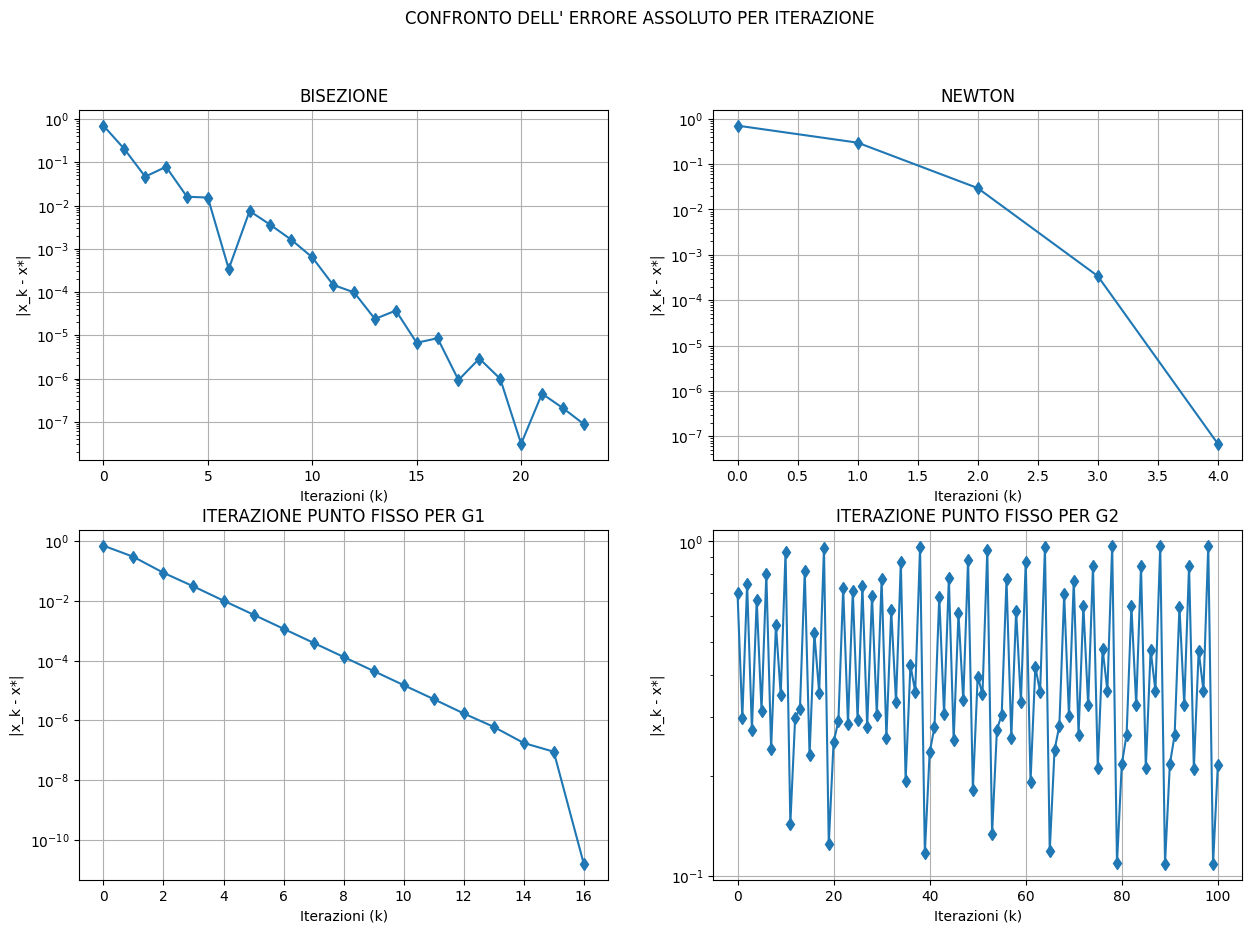

In [14]:
err_ass_bis=[]
err_ass_new=[]
err_ass_pf1=[]
err_ass_pf2=[]

for xk in iter_bis:
    err_ass_bis.append(abs(xk-x_star))

for xk in iter_new:
    err_ass_new.append(abs(xk-x_star))

for xk in iter_pf1:
    err_ass_pf1.append(abs(xk-x_star))

for xk in iter_pf2:
    err_ass_pf2.append(abs(xk-x_star))     


plt.figure(figsize=(15,10))
plt.suptitle("CONFRONTO DELL' ERRORE ASSOLUTO PER ITERAZIONE ")

plt.subplot(2,2,1)
plt.semilogy(range(len(iter_bis)), err_ass_bis, 'd-', label='Bisezione')
plt.xlabel('Iterazioni (k)')
plt.ylabel('|x_k - x*|')
plt.title('BISEZIONE')
plt.grid(True)

plt.subplot(2,2,2)
plt.semilogy(range(len(iter_new)), err_ass_new, 'd-', label='Newton')
plt.xlabel('Iterazioni (k)')
plt.ylabel('|x_k - x*|')
plt.title('NEWTON')
plt.grid(True)

plt.subplot(2,2,3)
plt.semilogy(range(len(iter_pf1)), err_ass_pf1, 'd-', label='Punto fisso g1')
plt.xlabel('Iterazioni (k)')
plt.ylabel('|x_k - x*|')
plt.title('ITERAZIONE PUNTO FISSO PER G1')
plt.grid(True)

plt.subplot(2,2,4)
plt.semilogy(range(len(iter_pf2)), err_ass_pf2, 'd-', label='Punto fisso g2')
plt.xlabel('Iterazioni (k)')
plt.ylabel('|x_k - x*|')
plt.title('ITERAZIONE PUNTO FISSO PER G2')
plt.grid(True)

plt.tight_layout
plt.show()
